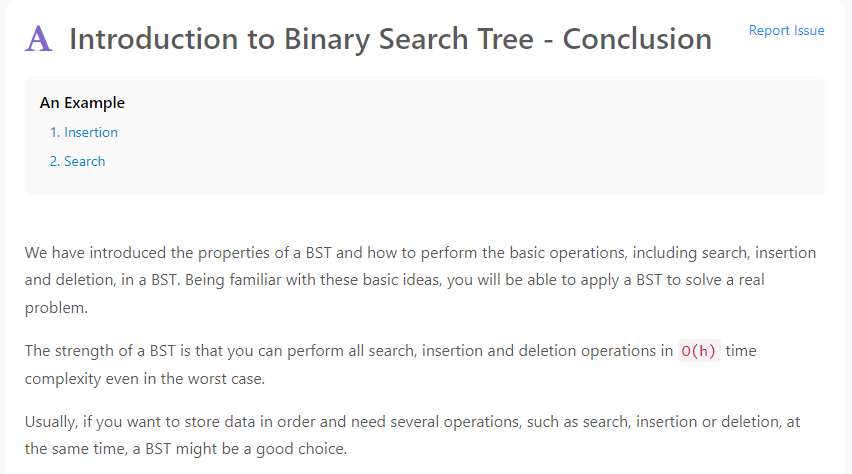

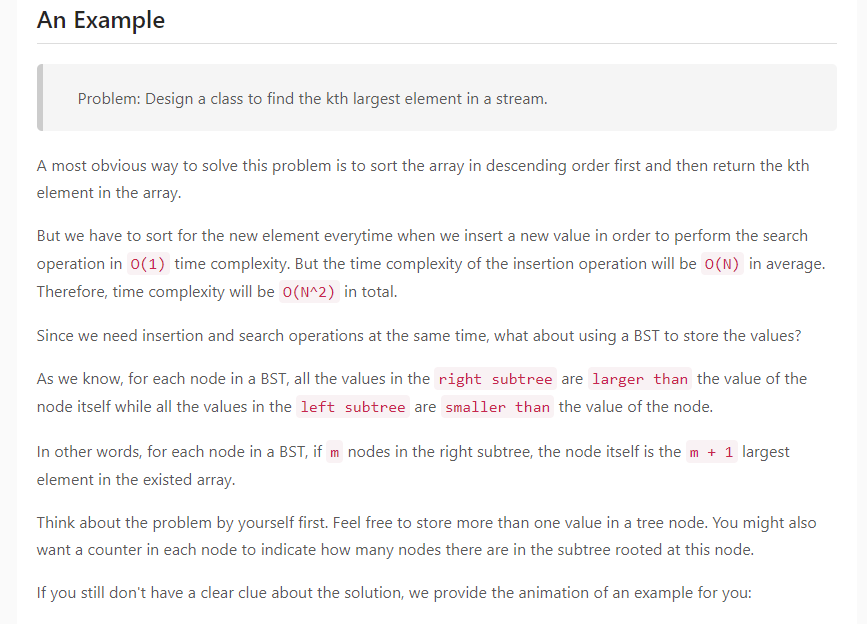

In [26]:
# Definition for a binary tree node.

class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
        
class Solution:   
    
    def __init__(self):
        self.root = None
    
    def insertIntoBST(self, root, val):
        if not root:
            root = TreeNode(val)
        

        if val < root.val:
            if root.left:
                self.insertIntoBST(root.left, val)
            else:
                root.left = TreeNode(val)
                
        elif val > root.val:
            if root.right:
                self.insertIntoBST(root.right, val)
            else:
                root.right = TreeNode(val)
                
        return root
    
    
    def helper(self, root, res, k):
        if len(res)==k:
            return

        if root :
            self.helper(root.right, res, k)
            if len(res)==k:
                return
            res.append(root.val)
            if len(res)==k:
                return
            self.helper(root.left, res, k)
            if len(res)==k:
                return
            
            
    def searchK(self, root, k):
        res = []
        self.helper(root, res, k);
        print(res)
        return res[-1]
        
        

In [27]:
# node_list = [2,3,4,7,8,9,10,19]
node_list = [17,5,4,7,8,9,10,19,25]

In [28]:
tree = Solution()

In [29]:
for x in node_list:
    tree.root = tree.insertIntoBST(tree.root, x)

In [30]:
print(tree.root)

In [33]:
tree.searchK(tree.root,9)

[25, 19, 17, 10, 9, 8, 7, 5, 4]


4

In [ ]:
# Failed v2
class TreeNode:
    def __init__(self, val, left=None, right=None):
        
        self.val = val
        self.left = left
        self.right = right

class KthLargest:

    def __init__(self, k: int, nums: List[int]):
        self.root = None
        self.k = k
        self.hash_map = {}
        self.max_k = None
        for val in nums:
            self.root = self.insertIntoBST(self.root, val)

    def insertIntoBST(self, root, val):
        # print(val)
        if not root:
            root = TreeNode(val)
            
            if val in self.hash_map:
                self.hash_map[val]+=1
            else:
                self.hash_map[val]=1
            
            return root
        
        
        if val < root.val:
            if root.left:
                self.insertIntoBST(root.left, val)
            else:
                root.left = TreeNode(val)
                if val in self.hash_map:
                    self.hash_map[val]+=1
                else:
                    self.hash_map[val]=1
                
        elif val > root.val:
            if root.right:
                self.insertIntoBST(root.right, val)
            else:
                root.right = TreeNode(val)
                
                if val in self.hash_map:
                    self.hash_map[val]+=1
                else:
                    self.hash_map[val]=1
        else:
            self.hash_map[val] += 1
            
        return root
    
    
    def helper(self, root, count, k):
        
        if count[0]>=k:
            return
        if root :
            self.helper(root.right, count, k)
            if count[0]>=k:
                return
            count[0]+=self.hash_map[root.val]
            count[1] = root.val
            # print('count:',count)
            if count[0]>=k:
                return
            self.helper(root.left, count, k)
            if count[0]>=k:
                return
        else:
            return
        
    def searchK(self, k):
        
        
        count = [0,None]
        self.helper(self.root, count, k);
        # print(res)
        return count[1]
            
    def add(self, val: int) -> int:
        self.root = self.insertIntoBST(self.root, val)
        # print('hash_map:', self.hash_map)
        
        if self.max_k == None or val > self.max_k:
            self.max_k = self.searchK(self.k)
            
        return self.max_k


# Your KthLargest object will be instantiated and called as such:
# obj = KthLargest(k, nums)
# param_1 = obj.add(val)

## Standard Answer I (Using heap)

In [ ]:
class KthLargest:
    def __init__(self, k: int, nums: List[int]):
        self.k = k
        self.heap = nums
        heapq.heapify(self.heap)
        
        while len(self.heap) > k:
            heapq.heappop(self.heap)

    def add(self, val: int) -> int:
        heapq.heappush(self.heap, val)
        if len(self.heap) > self.k:
            heapq.heappop(self.heap)
        return self.heap[0]

In [36]:
>>> import heapq
>>> heap = []
>>> heapq.heappush(heap, (5, 'write code'))
>>> heapq.heappush(heap, (7, 'release product'))
>>> heapq.heappush(heap, (1, 'write spec'))
>>> heapq.heappush(heap, (3, 'create tests'))
>>> heapq.heappop(heap)#pops smallest
(1, 'write spec')
>>> heapq.nlargest(2,heap)#displays n largest values without popping
[(7, 'release product'),(5, 'write code')]
>>> heapq.nsmallest(2,heap)#displays n smallest values without popping
[(3, 'create tests'),(5, 'write code')]
>>> heap = [1, 3, 5, 7, 9, 2, 4, 6, 8, 0]
>>> heapq.heapify(heap)#converts a list to heap
>>> heap
[0, 1, 2, 6, 3, 5, 4, 7, 8, 9]
>>> def heapsort(iterable):
...     h = []
...     for value in iterable:
...         heapq.heappush(h, value)
...     return [heapq.heappop(h) for i in range(len(h))]
...
>>> heapsort([1, 3, 5, 7, 9, 2, 4, 6, 8, 0])
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

## Standard Answer II 

```cpp
struct Node {
    Node* left;
    Node* right;
    int val;
    int cnt;
    Node(int v, int c) : left(NULL), right(NULL), val(v), cnt(c) {}
};

class KthLargest {
private:
    Node* insertNode(Node* root, int num) {
        if (!root) {
            return new Node(num, 1);	    // return a new node if root is null
        }
        if (root->val < num) {			// insert to the right subtree if val > root->val
            root->right = insertNode(root->right, num);
        } else {						// insert to the left subtree if val <= root->val
            root->left = insertNode(root->left, num);
        }
        root->cnt++;
        return root;
    }
    int searchKth(Node* root, int k) {
        // m = the size of right subtree
        int m = root->right ? (root->right)->cnt : 0;
        // root is the m+1 largest node in the BST
        if (k == m + 1) {
            return root->val;
        }
        if (k <= m) {
            // find kth largest in the right subtree
            return searchKth(root->right, k);
        } else {
            // find (k-m-1)th largest in the left subtree
            return searchKth(root->left, k - m - 1);
        }
    }
    Node* root;
    int m_k;
public:
    KthLargest(int k, vector<int> nums) {
        root = NULL;
        for (int i = 0; i < nums.size(); ++i) {
            root = insertNode(root, nums[i]);
        }
        m_k = k;
    }
    
    int add(int val) {
        root = insertNode(root, val);
        return searchKth(root, m_k);
    }
};

/**
 * Your KthLargest object will be instantiated and called as such:
 * KthLargest obj = new KthLargest(k, nums);
 * int param_1 = obj.add(val);
 */

```

In [ ]:
class Node:
    def __init__(self, val, cnt):
        self.left = None
        self.right = None
        self.val = val
        self.cnt = cnt

class KthLargest:
    def __init__(self, k: int, nums: List[int]):
        self.root = None;
        self.m_k = k
        for x in nums:
            self.root = self.insertNode(self.root, x);

    def add(self, val):
        self.root = self.insertNode(self.root, val);
        return self.searchKth(self.root, self.m_k);
        
    def insertNode(self, root, num):
        if not root:
            return Node(num, 1);        # return a new node if root is null
    
        if root.val < num:             # insert to the right subtree if val > root->val
            root.right = self.insertNode(root.right, num)
        else:                        # insert to the left subtree if val <= root->val
            root.left = self.insertNode(root.left, num)
            
        root.cnt+=1;
        return root;
        
        
    def searchKth(self, root, k):
        
        # m = the size of right subtree
        if root.right:
            m = root.right.cnt
        else:
            m = 0
        
        # root is the m+1 largest node in the BST
        if k == m + 1:
            return root.val;
        
        if k <= m:
            # print('tata1')
            # find kth largest in the right subtree
            return self.searchKth(root.right, k);
        else:
            # print('tata2')
            # find (k-m-1)th largest in the left subtree
            return self.searchKth(root.left, k - m - 1)        
    

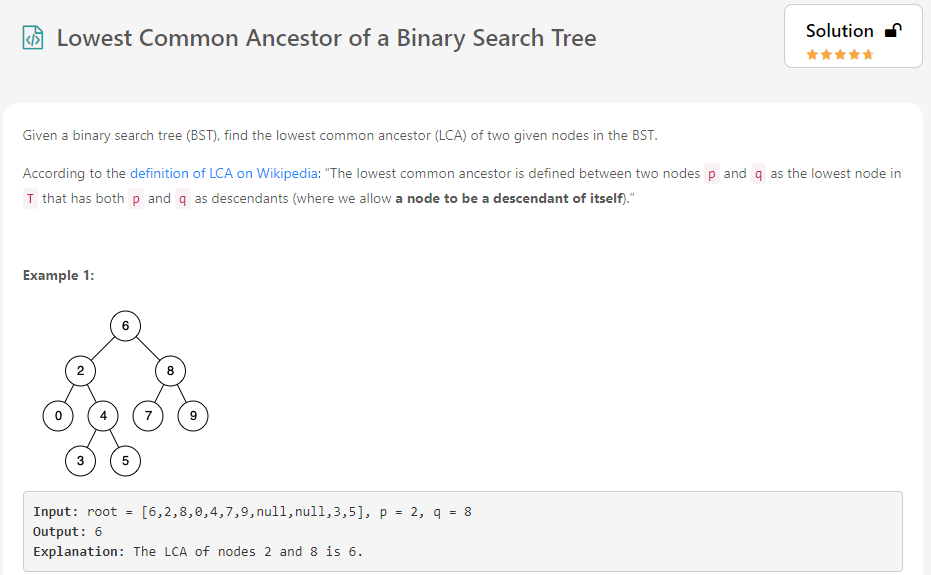

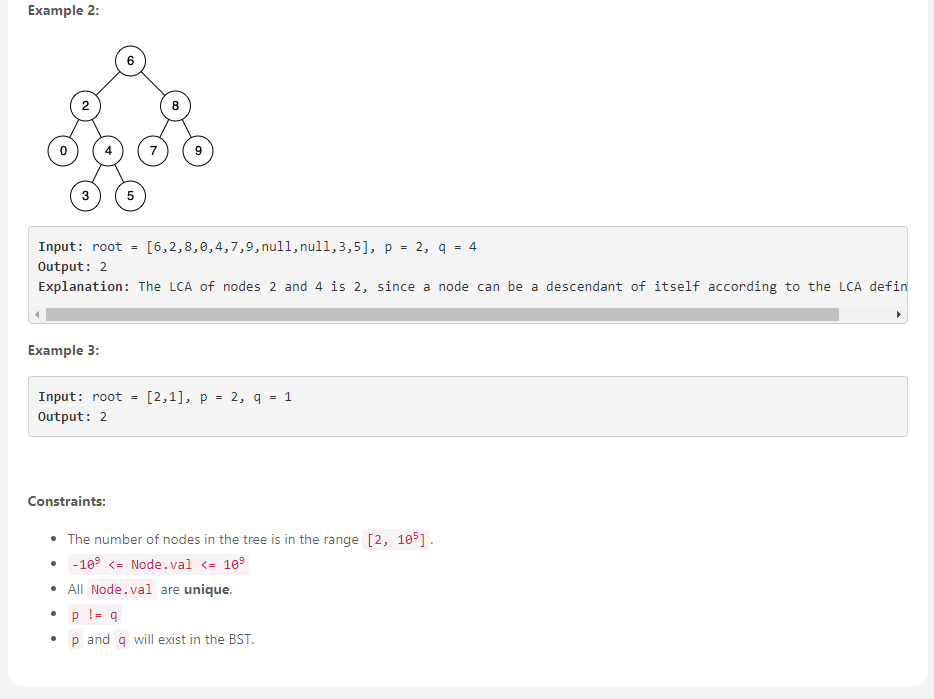